# Aflevering 7

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Opgave a) Angiv hvordan belysningsniveauet $𝑦 = (𝑦_0, . . . , 𝑦_{599})$ og styrkerne $𝑥 = (𝑥_0, . . . , 𝑥_{11})$ er relateret via et lineært ligningssystem.

\begin{matrix}
\frac{x_0}{d^2_{0,0}} & + & \frac{x_1}{d^2_{1,0}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,0}} & + & \frac{x_{i}}{d^2_{i,0}} = & y_0\\
\frac{x_0}{d^2_{0,1}} & + & \frac{x_1}{d^2_{1,1}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,1}} & + & \frac{x_{i}}{d^2_{i,1}} = & y_1\\

&&&& \vdots\\
\frac{x_0}{d^2_{0,599}} & + & \frac{x_1}{d^2_{1,599}} & + & \cdots & + & \frac{x_{i-1}}{d^2_{i-1,599}} & + & \frac{x_{i}}{d^2_{i,599}} = & y_{599}\\
\end{matrix}

### Opgave b) Lav en heatplot der viser belysningsniveauet i hver kvadrat når alle lamper er tændt med styrke $𝑥_𝑖 = 20.0$

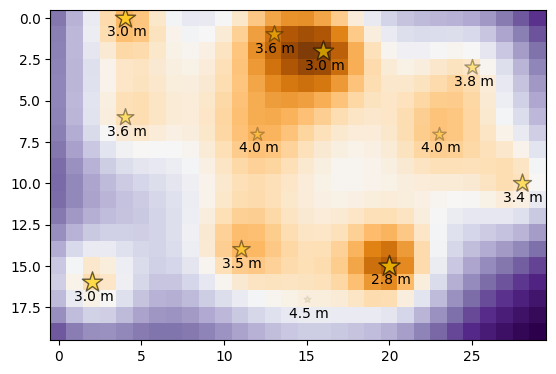

In [157]:
#Liste af lampeplaceringer

lamper = np.array([[4,19,3],[13,18,3.6],[16,17,3.0],[25,16,3.8],[4,13,3.6],[12,12,4.0],[23,12,4.0],[28,9,3.4],[2,3,3.0],[11,5,3.5],[15,2,4.5],[20,4,2.8]])

def feltstyrke_lys(lamper, i):
    lysstyrke=0
    
    #Konverter i til koordinater
    i_y=int(i/30)
    while i>=30:
        i = i-30
    i_x = i

    for element in lamper:
        lysstyrke += 20/(np.sqrt(np.abs(element[0]-i_x)**2 + np.abs(element[1]-i_y)**2 + np.abs(element[2]-0)**2)**2)
    return lysstyrke
        

#Matrix with all the values
feltstyrke = np.zeros((20,30))

for i in range(20):
    for j in range(30):
        feltstyrke[i,j] = feltstyrke_lys(lamper, i*30+j)
        
#plot the matrix flipped on the y-axis looking like lamps
plt.imshow(feltstyrke[::-1], cmap='PuOr_r')

#plot the lamps with inverted y-axis
for element in lamper:
    plt.scatter(element[0], 19-element[1], c='gold', edgecolors='black', marker='*', alpha=1-(0.045*element[2]**2), s=400-(4.3*element[2])**2)

#Plot text with the lamp height above the lamps
for element in lamper:
    plt.text(element[0]-1.1, 19-element[1]+1.1, str(element[2])+' m', color='black', fontsize=10)


### Opgave c) Der ønskes at belysningsniveauet bliver så tæt så muligt på 1,0 i alle kvadrater. Brug den mindste kvadraters metode til at bestemme i python lysstyrken i hver lampe ved brug af (i) 𝑄𝑅-dekomponering via forbedret Gram-Schmidt, hhv. (ii) SVD-dekomponering.

[[0.00259067 0.00259334 0.00259599 ... 0.00096318 0.00096079 0.0009584 ]
 [0.00212332 0.00212919 0.00213506 ... 0.00170683 0.00170192 0.00169704]
 [0.00204082 0.00204749 0.00205419 ... 0.0023484  0.00234077 0.00233316]
 ...
 [0.00670017 0.0067498  0.00679995 ... 0.00260707 0.0025943  0.00258163]
 [0.00323363 0.00324936 0.0032652  ... 0.00328114 0.0032652  0.00324936]
 [0.00218895 0.00219856 0.00220824 ... 0.00649931 0.00645786 0.00641673]]
[[ 2.21637789e+00  2.43889825e+00  2.70272270e+00  3.01953646e+00
   3.40441472e+00  3.87790458e+00  4.46868746e+00  5.21594910e+00
   6.17094666e+00  7.39603937e+00  8.95627070e+00  1.08924241e+01
   1.31574867e+01  1.55113721e+01  1.74490547e+01  1.83571859e+01
   1.79500201e+01  1.65291959e+01  1.46804939e+01  1.28106413e+01
   1.10240514e+01  9.30240869e+00  7.68054591e+00  6.24514827e+00
   5.05545099e+00  4.11481980e+00  3.39039875e+00  2.83798793e+00
   2.41602400e+00  2.09051267e+00]
 [ 2.28756118e+00  2.51743944e+00  2.79075908e+00  3.120220

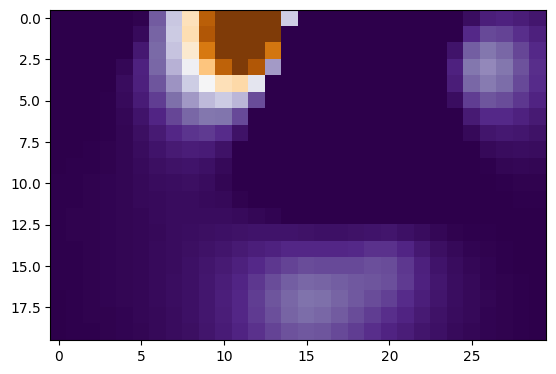

In [172]:
#Konstruer matrix med alle værdier

matrice=np.zeros((12,600))
for i in range(12):
    for j in range(600):
        matrice[i,j]=1/(np.sqrt(np.abs(lamper[i,0]-j/20)**2 + np.abs(lamper[i,1]-i)**2 + np.abs(lamper[i,2]-0)**2)**2)

print(matrice)

#QR decomposition function
def forbedret_gram_schmidt(a):
    _, k = a.shape
    q = np.copy(a)
    r = np.zeros((k, k)) 
    for i in range(k):
            r[i, i] = np.linalg.norm(q[:, i])
            q[:, i] /= r[i, i]
            r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:]
            q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:]
    return q, r

q, r = forbedret_gram_schmidt(matrice.T)


c = q.T@(np.ones(600))

def back_subs(r,c):
    _, n = r.shape
    x = np.empty((n,1))
    for i in reversed(range(n)):
        x[i] = (c[i] - r[i,i+1:]@x[i+1:])/r[i,i]
    return x

nye_styrker=back_subs(r,c)

################################################

#Liste af lampeplaceringer

def feltstyrke_lys(lamper, i):
    lysstyrke=0
    
    #Konverter i til koordinater
    i_y=int(i/30)
    while i>=30:
        i = i-30
    i_x = i

    for nr, element in enumerate(lamper):
        lysstyrke += nye_styrker[nr,0]/(np.sqrt(np.abs(element[0]-i_x)**2 + np.abs(element[1]-i_y)**2 + np.abs(element[2]-0)**2)**2)
    return lysstyrke
        

#Matrix with all the values
feltstyrke = np.zeros((20,30))

for i in range(20):
    for j in range(30):
        feltstyrke[i,j] = feltstyrke_lys(lamper, i*30+j)
        
#plot the matrix flipped on the y-axis looking like lamps
plt.imshow(feltstyrke[::-1], cmap='PuOr_r', clim=(2, 100))
    
print(feltstyrke)